## GCN 对海豚社会关系网络进行构造


GCN的背景：  
+ 自然语言处理操作对象是序列信息，一维的结构 => 使用RNN模型针对序列结构进行操作，使得序列前后的信息互相影响，很好地捕捉序列的特征  
+ 图片或者自然语言，都属于欧式空间的数据 => 有维度的概念，数据的特点是结构规则  
+ 现实生活中，很多是不规则的数据结构，典型的就是图结构，或称拓扑结构，如社交网络、化学分子结构、知识图谱等等  
+ 即使是语言，实际上其内部也是复杂的树形结构，也是一种图结构  
+ 针对图片，在做目标识别的时候，我们关注的实际上只是二维图片上的部分关键点，这些点组成的也是一个图的结构  

GCN算法：  
+ 对于一个图网络G=（V，E），有N个节点，每个节点都有自己的特征，目标是要学习图上的信号或特征的一个映射 
GCN模型的输入为矩阵X和A：   
+ 矩阵X，表示这些节点特征，N×D维矩阵  
+ 矩阵A，表示各个节点之间的关系，N×N维矩阵，也称为邻接矩阵（adjacency matrix）

基于dolphins.gml数据，对于海豚社会关系网络进行探索,
+ 首先对数据集进行构建图网络,提取GCN模型需要的特征矩阵邻矩阵A和度矩阵X，构建拉普拉斯算子X^-1*A  
+ 构建隐藏层参数，参数初始化为均值0、方差为1的正太分布  
+ 定义激活函数Relu,比较在激活函数和没有激活函数情况下结果的差别  

结果显示，没有激活函数的网络关系反而比有激活函数的好；

In [1]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

In [4]:
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
print(type(G))

<class 'networkx.classes.graph.Graph'>


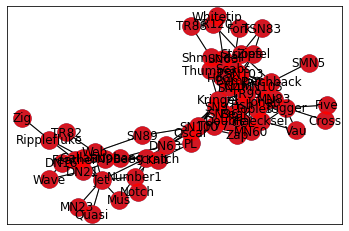

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [5]:
# 可视化
plot_graph(G)
print(list(G.nodes()))

In [7]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [8]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I # 让对角线元素为1
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [11]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [9]:
# 初始化权重, normal 正态分布 loc均值 scale标准差（0-1正太分布)
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[ 1.67682137e-01 -8.20427460e-01  1.33551426e+00 -1.00857830e+00]
 [ 1.07163883e+00 -6.84206413e-02 -6.51961636e-01  4.71244548e-01]
 [-6.79166566e-01 -6.35746861e-01  6.22161848e-01 -3.36247660e-01]
 [-1.27559957e+00 -1.52549490e+00  1.65553260e+00  5.24391820e-01]
 [-4.12507479e-01 -6.46034200e-01 -2.72827708e-01 -7.54887389e-01]
 [ 6.96920506e-01  1.43354706e+00 -1.52224659e+00 -2.21851058e-01]
 [-1.22034014e+00  1.15485453e+00  1.90555989e-01  1.48214962e+00]
 [ 1.45507483e+00 -5.64549802e-02  7.61825311e-01  9.99511971e-02]
 [-7.15428681e-01  4.54226364e-01  5.49796257e-01 -1.43088113e+00]
 [ 2.24963984e-01  1.31993786e-01  9.01668793e-01 -2.09010555e-01]
 [-8.09558983e-01 -1.57706433e+00  2.32888941e-04  1.17511202e+00]
 [ 2.13023887e+00 -2.45927229e-01  1.44979399e+00  3.13658701e-01]
 [-9.86727289e-01  7.79143556e-01  9.54406973e-01  1.35258130e-01]
 [-1.16661990e-01  5.16325025e-01 -1.28802741e+00  1.22116441e-02]
 [ 9.98674989e-01 -9.23257645e-01  1.10823416e+00  1.226

In [12]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

output=
 [[0.11244163 0.40337228]
 [0.4151185  0.24281499]
 [0.         0.69394371]
 [0.41828483 1.01993099]
 [0.         0.2012907 ]
 [0.64312755 0.        ]
 [0.59246687 0.        ]
 [0.28248318 0.69869216]
 [0.18929098 0.42670805]
 [0.29952629 0.        ]
 [0.         0.18825017]
 [0.         1.4175007 ]
 [1.10569135 1.63811329]
 [0.32171064 0.        ]
 [0.24386354 0.92343785]
 [0.         0.31941511]
 [0.33577982 0.57752422]
 [0.41234406 0.        ]
 [0.         0.10158126]
 [0.26625064 0.52956194]
 [0.12809484 0.31714316]
 [0.05139102 0.26485909]
 [0.         0.        ]
 [0.         0.50686309]
 [0.         0.28354098]
 [0.81983706 0.        ]
 [0.93714164 0.        ]
 [0.75954278 0.05695079]
 [0.05026922 0.        ]
 [0.07038118 0.29271324]
 [0.         0.16436192]
 [0.1141539  0.        ]
 [0.28487987 0.1561685 ]
 [0.         0.20966006]
 [0.19913487 0.58883211]
 [0.28035234 1.02342717]
 [0.26835243 0.35876181]
 [0.21349246 0.52114433]
 [0.29349841 0.75990549]
 [0.31914712 0. 

In [13]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)


feature_representations=
 {'Beak': array([0.11244163, 0.40337228]), 'Beescratch': array([0.4151185 , 0.24281499]), 'Bumper': array([0.        , 0.69394371]), 'CCL': array([0.41828483, 1.01993099]), 'Cross': array([0.       , 0.2012907]), 'DN16': array([0.64312755, 0.        ]), 'DN21': array([0.59246687, 0.        ]), 'DN63': array([0.28248318, 0.69869216]), 'Double': array([0.18929098, 0.42670805]), 'Feather': array([0.29952629, 0.        ]), 'Fish': array([0.        , 0.18825017]), 'Five': array([0.       , 1.4175007]), 'Fork': array([1.10569135, 1.63811329]), 'Gallatin': array([0.32171064, 0.        ]), 'Grin': array([0.24386354, 0.92343785]), 'Haecksel': array([0.        , 0.31941511]), 'Hook': array([0.33577982, 0.57752422]), 'Jet': array([0.41234406, 0.        ]), 'Jonah': array([0.        , 0.10158126]), 'Knit': array([0.26625064, 0.52956194]), 'Kringel': array([0.12809484, 0.31714316]), 'MN105': array([0.05139102, 0.26485909]), 'MN23': array([0., 0.]), 'MN60': array([0.        

In [17]:
# 不同节点value，绘制不同的颜色
# def getValue(value):
#     colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
#     return colorList[int(value)]

# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        #value = G.nodes[node_name]['value']
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250) # ,color = getValue(value),
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()

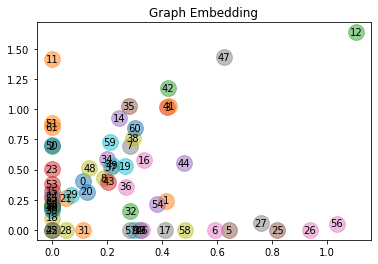

In [18]:
plot_node(output, 'Graph Embedding')

output(去掉relu)=
: [[-0.54953571 -0.15192261]
 [ 0.19408668 -0.23731913]
 [-0.9284414   0.21003523]
 [ 0.33123092  0.95316638]
 [-0.57537738 -0.89421669]
 [ 0.41821878 -1.92867346]
 [ 0.53023211 -1.43507869]
 [ 0.17513601  0.41568019]
 [-0.17211749 -0.09813373]
 [ 0.08680712 -1.55006566]
 [-1.04652893 -0.94630607]
 [-0.89823184  1.11046837]
 [ 1.87335948  1.28854731]
 [ 0.1304939  -1.33716429]
 [-0.01796165  0.76888511]
 [-0.63188471 -0.40836356]
 [ 0.27165749  0.62061246]
 [ 0.06586913 -1.66866637]
 [-1.0272943  -0.84252413]
 [ 0.22488445  0.11864703]
 [-0.43915502 -0.42609845]
 [-0.52631466 -0.55691219]
 [-1.42839473 -2.46562936]
 [-0.45089252  0.24101465]
 [-0.99553931 -0.61069548]
 [ 0.83477786 -0.62664671]
 [ 1.16485866 -0.26232294]
 [ 0.92016563 -0.313156  ]
 [-0.57837593 -1.17602677]
 [-0.59316273 -0.87128282]
 [-1.15871437 -1.14494287]
 [-0.84298086 -2.82207635]
 [ 0.18962747 -1.46186673]
 [-1.60317669 -2.2462638 ]
 [ 0.10324863  0.39314132]
 [ 0.08107064  0.95512001]
 [ 0.28967

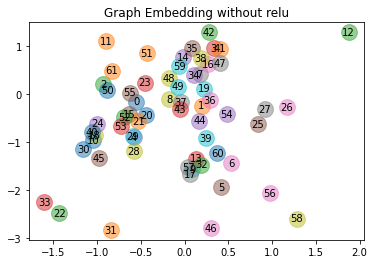

In [19]:
# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')